<a href="https://colab.research.google.com/github/Blackcurrant06/MachineLearning/blob/main/UTS/ClassificationUTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imbalanced-learn

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import seaborn as sns

In [28]:
# Load data with proper delimiter
df = pd.read_csv(r'/content/KlasifikasiUTS.csv', delimiter=',', engine='python')

# Ensure the data is parsed correctly
if len(df.columns) == 1:
    df = df['Time,"V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount","Class"'].str.split(',', expand=True)
    df.columns = ["Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15", "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23", "V24", "V25", "V26", "V27", "V28", "Amount", "Class"]



  Time        V1        V2        V3        V4        V5        V6        V7  \
0    0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1    0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2    1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3    1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4    2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amoun

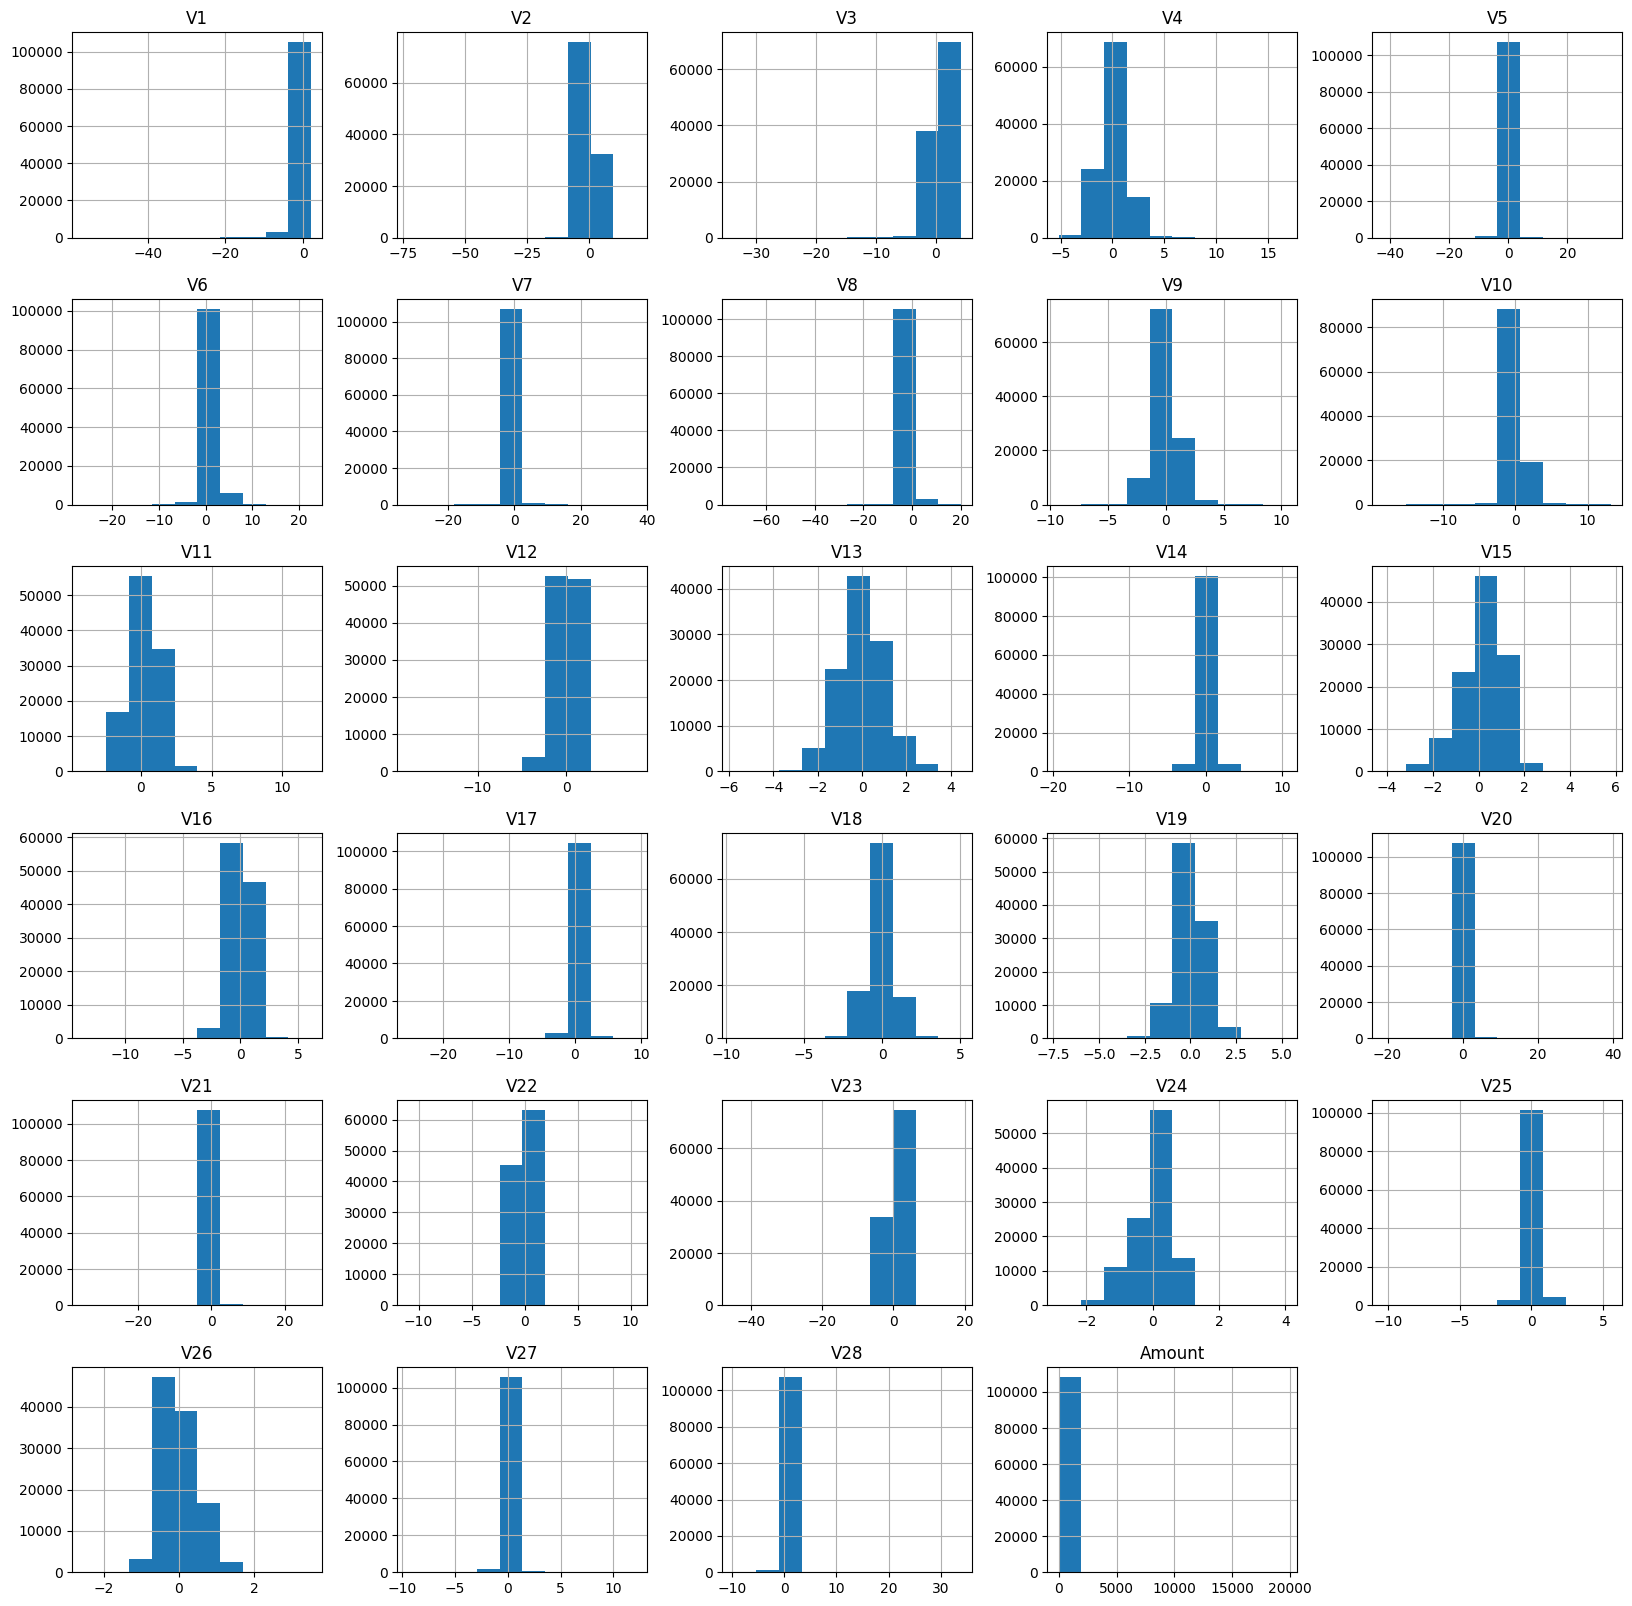

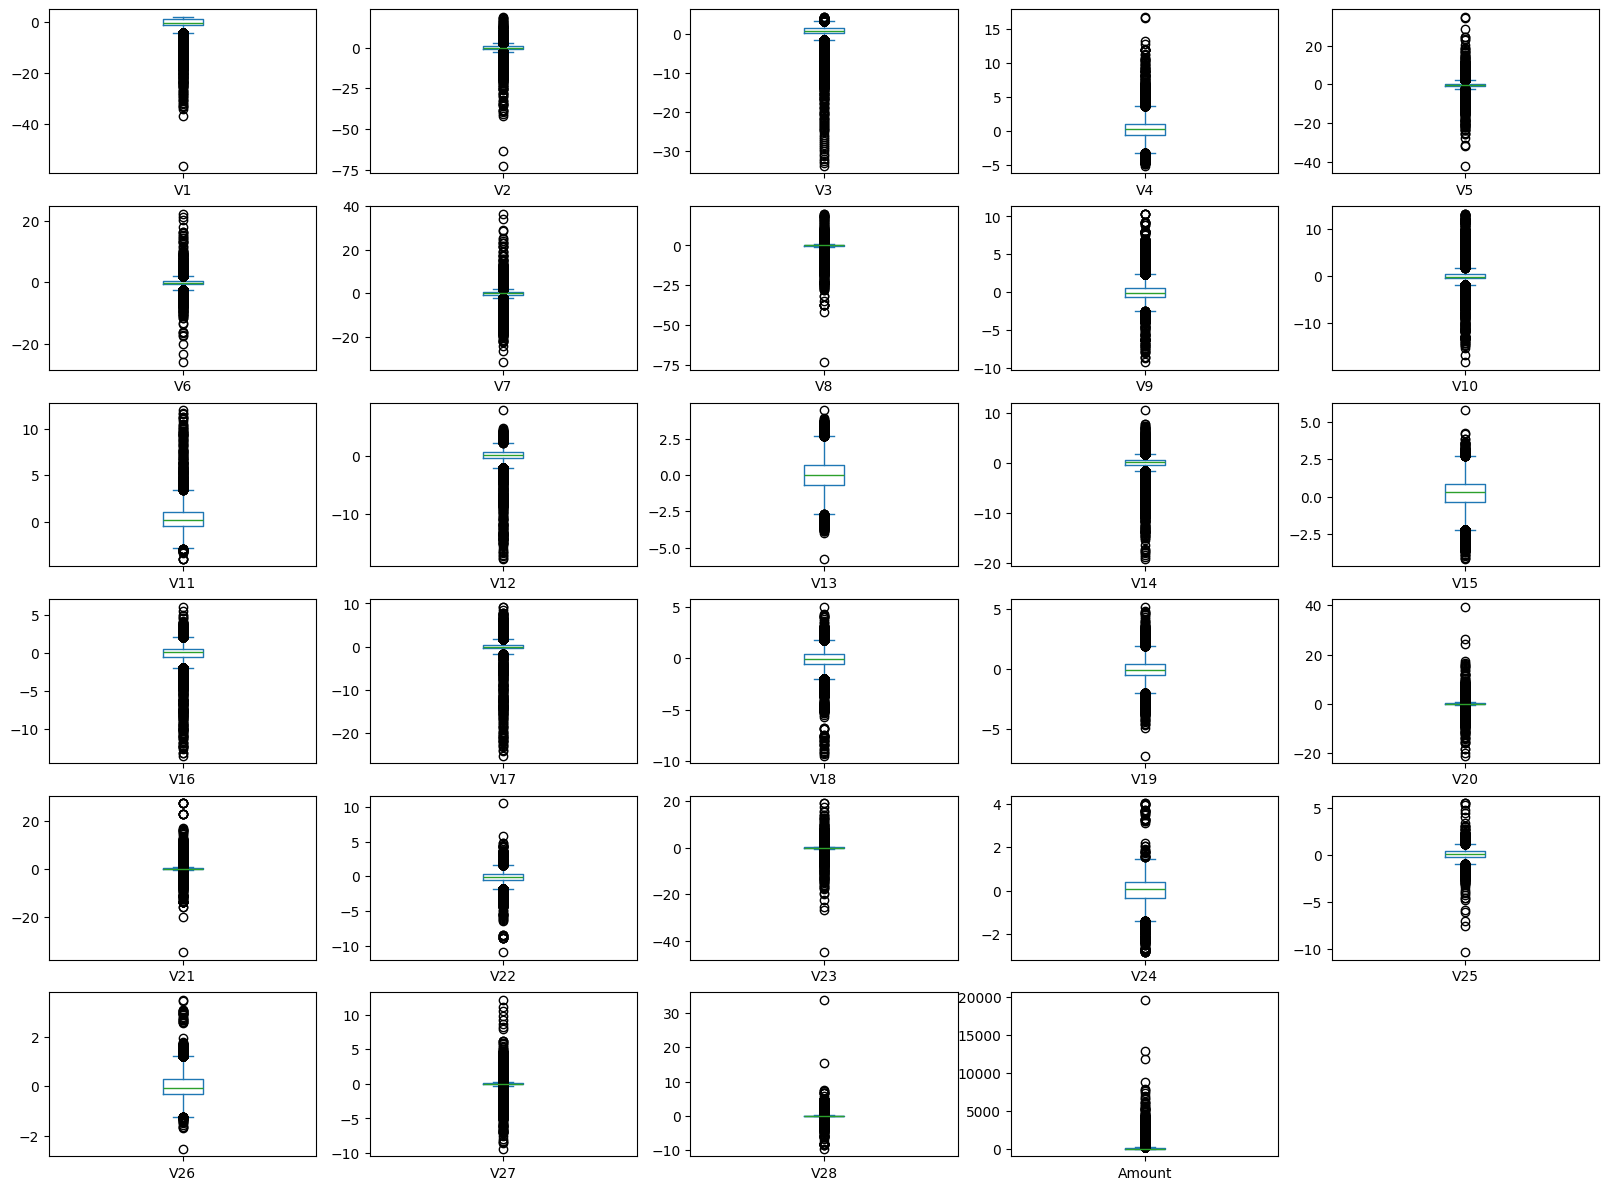

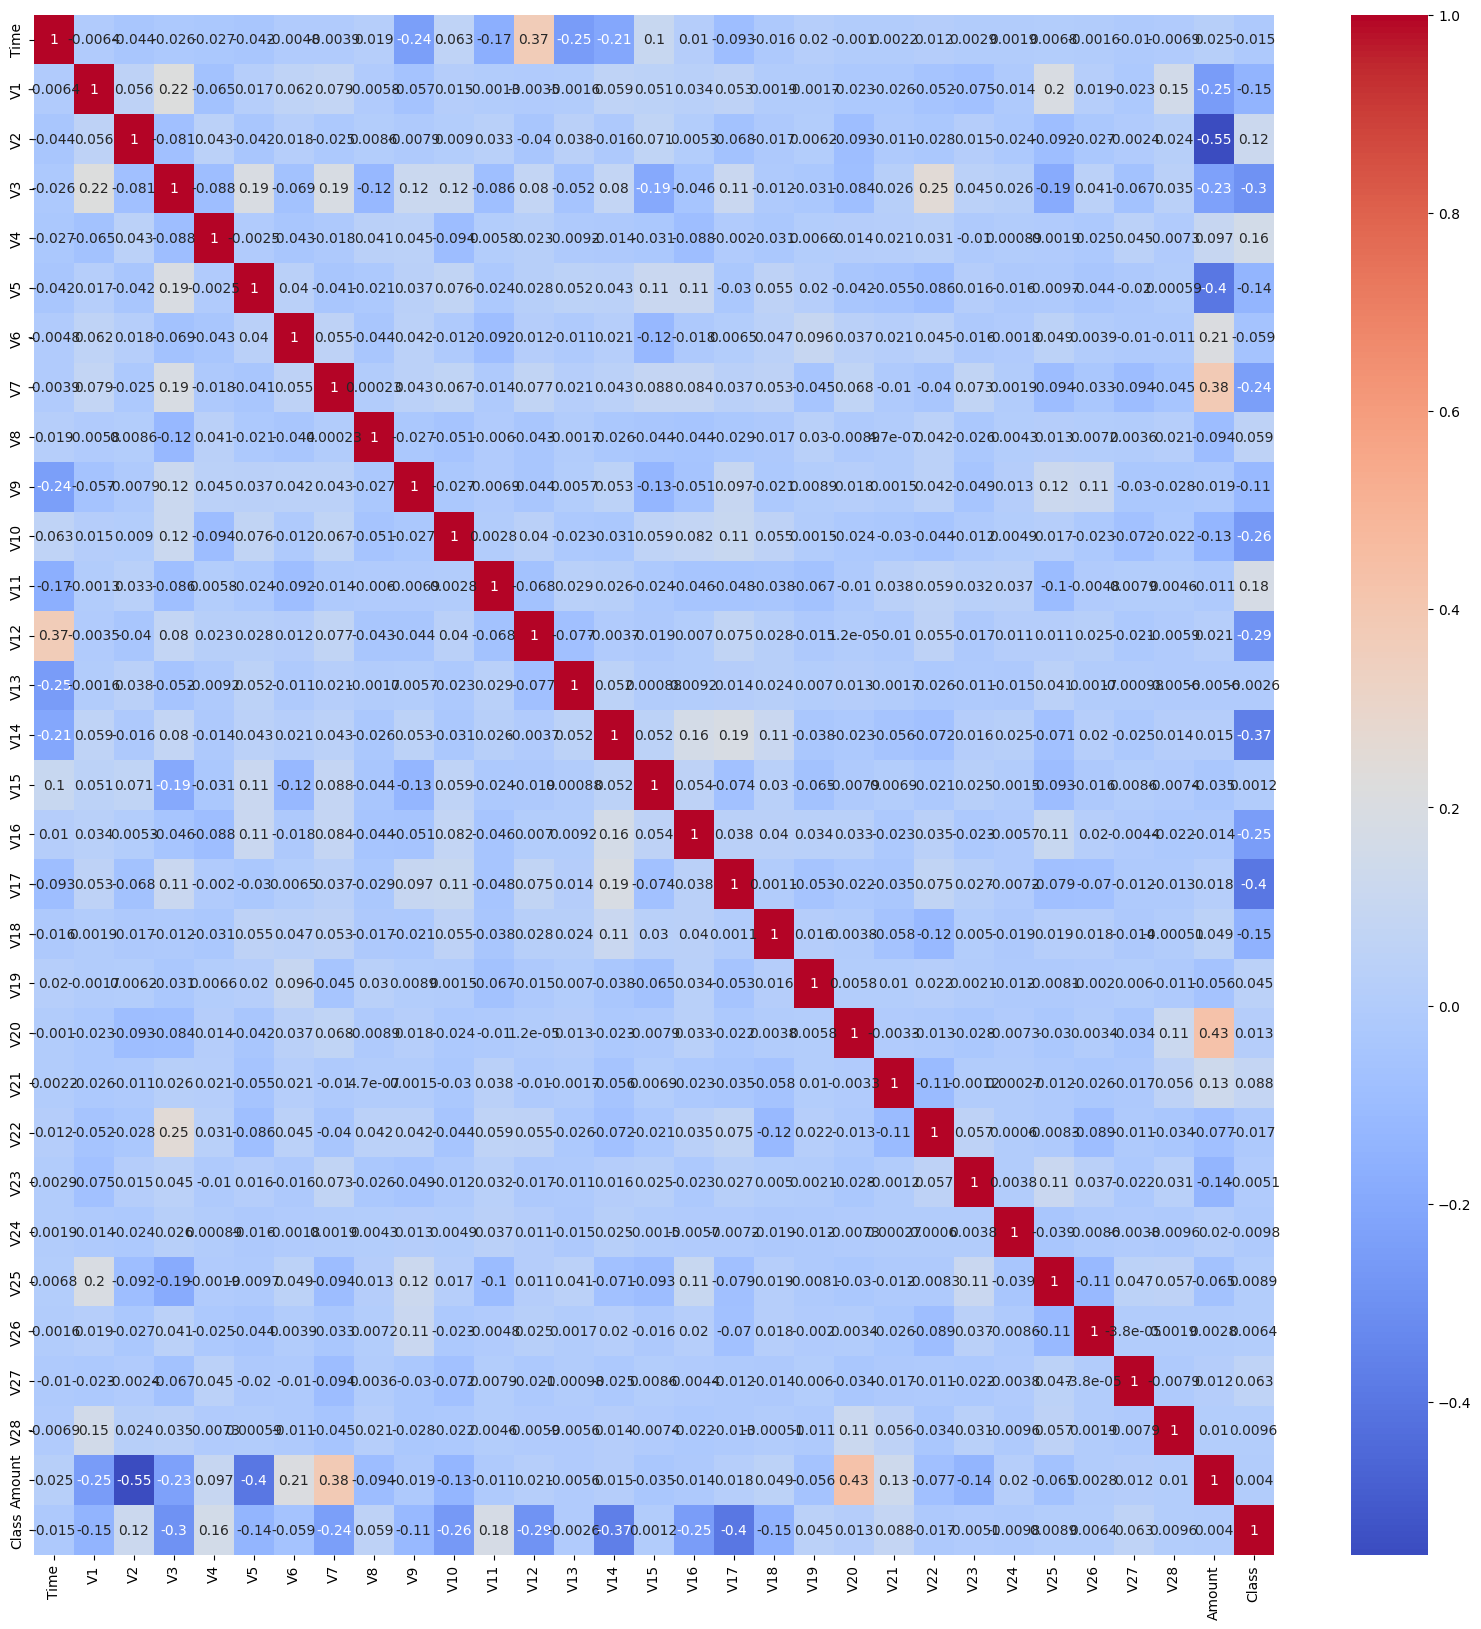

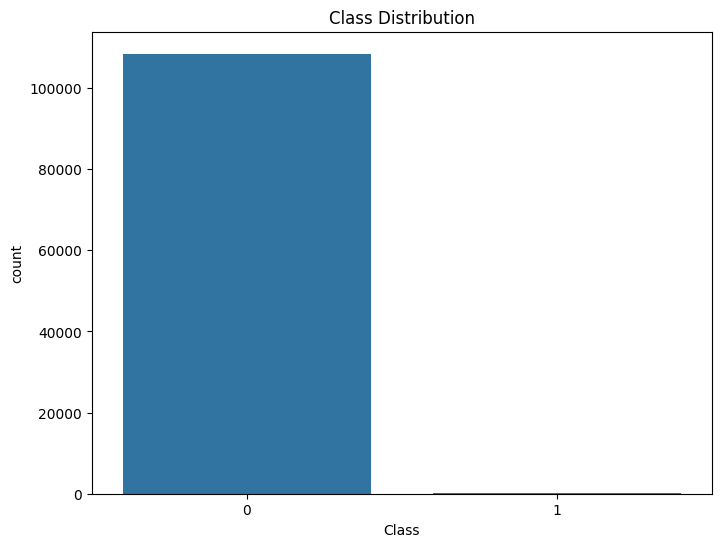

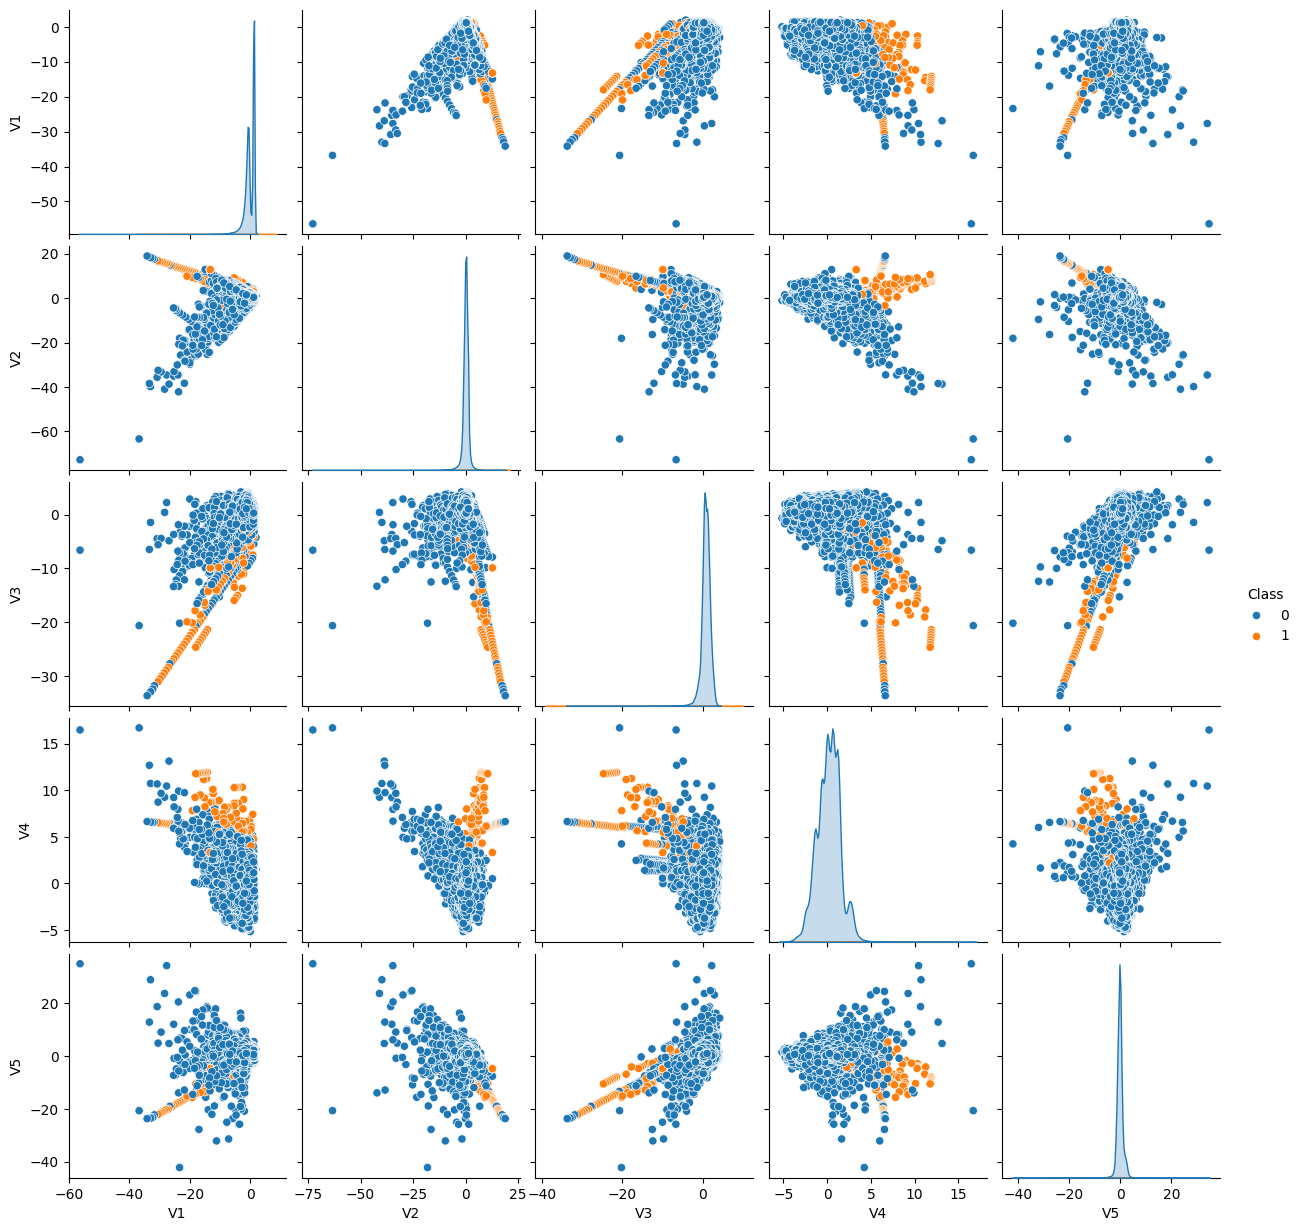

<ipython-input-32-17bbb6459cb0>:51: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


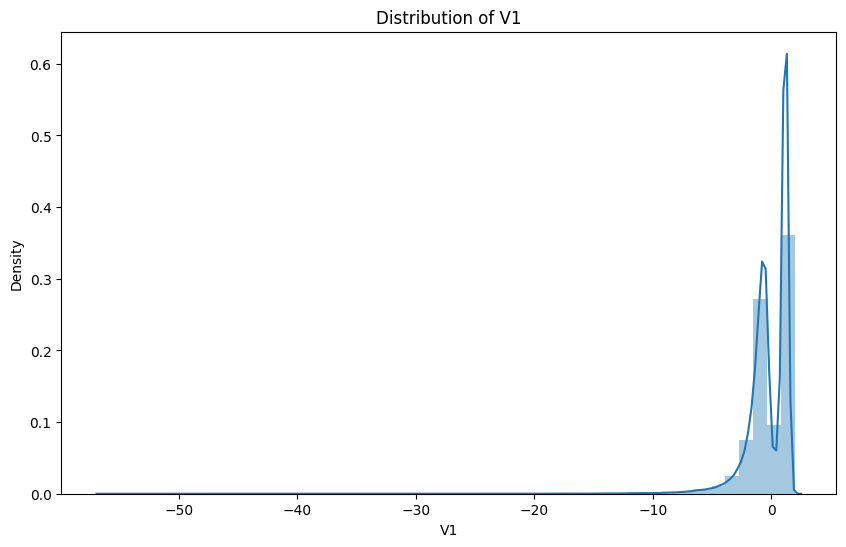

<ipython-input-32-17bbb6459cb0>:51: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


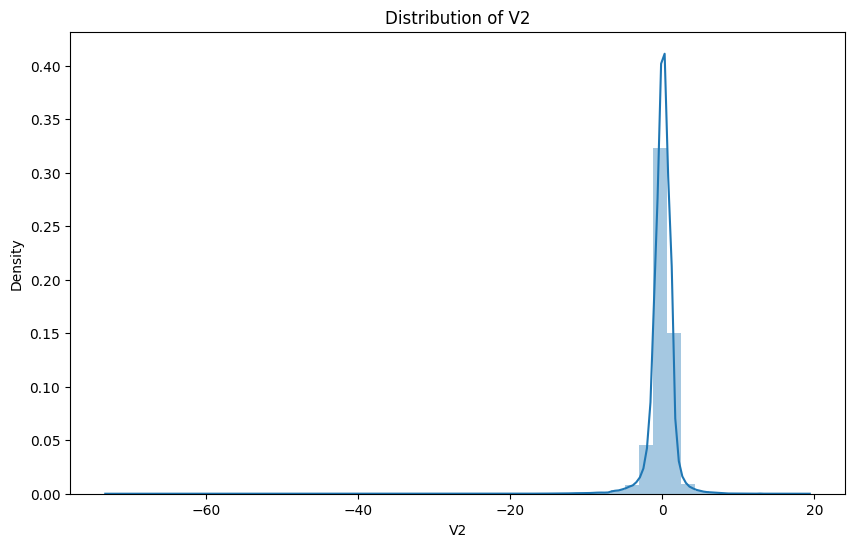

<ipython-input-32-17bbb6459cb0>:51: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


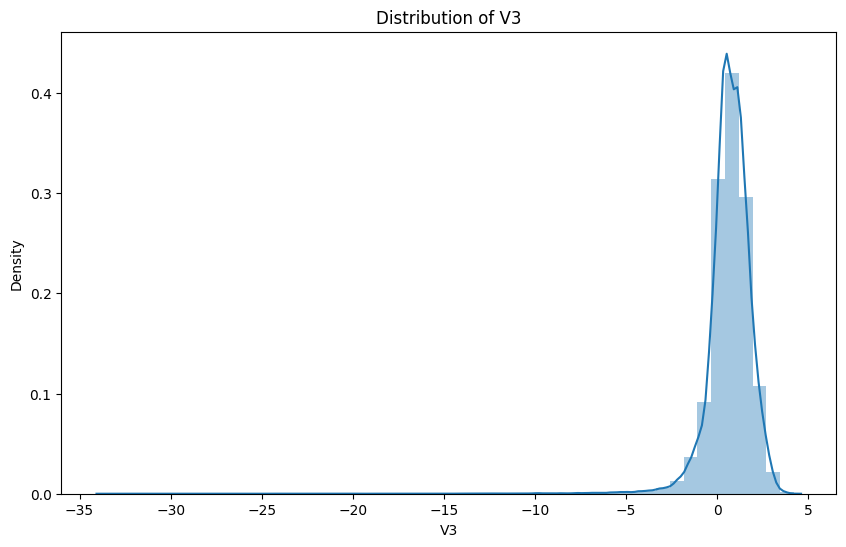

<ipython-input-32-17bbb6459cb0>:51: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


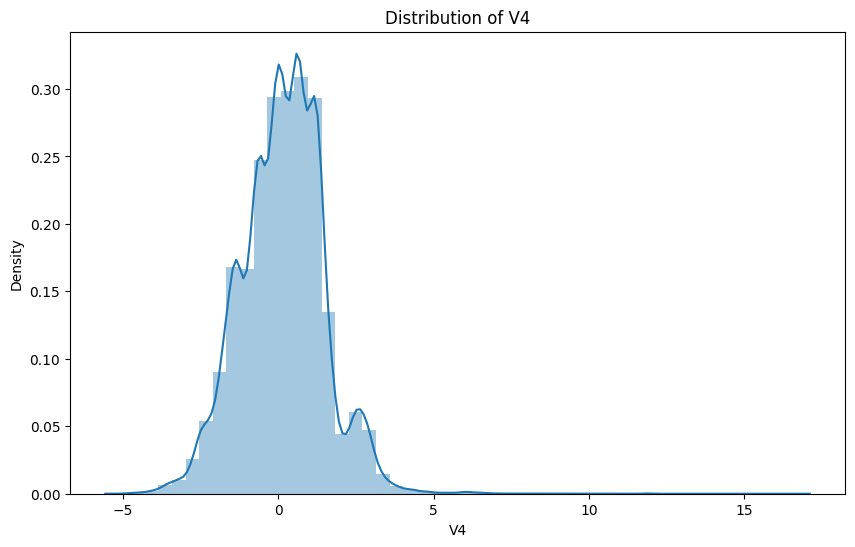

<ipython-input-32-17bbb6459cb0>:51: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


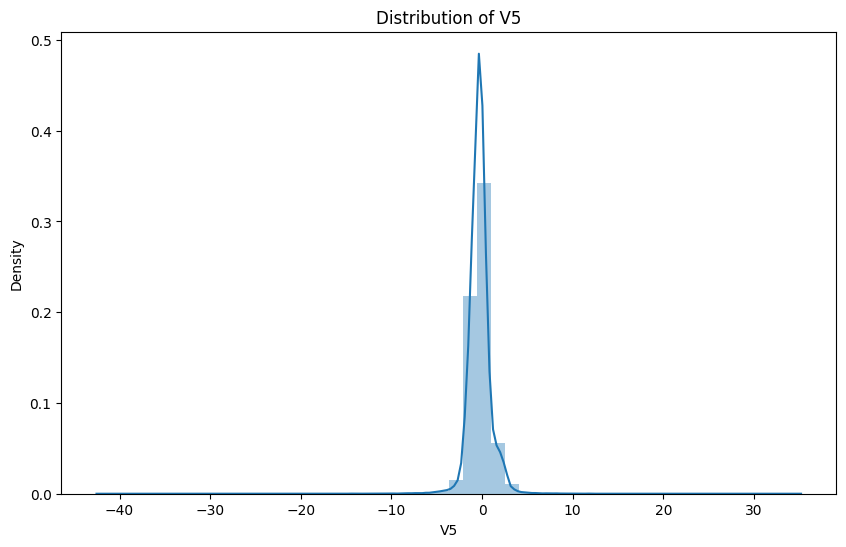

<ipython-input-32-17bbb6459cb0>:51: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


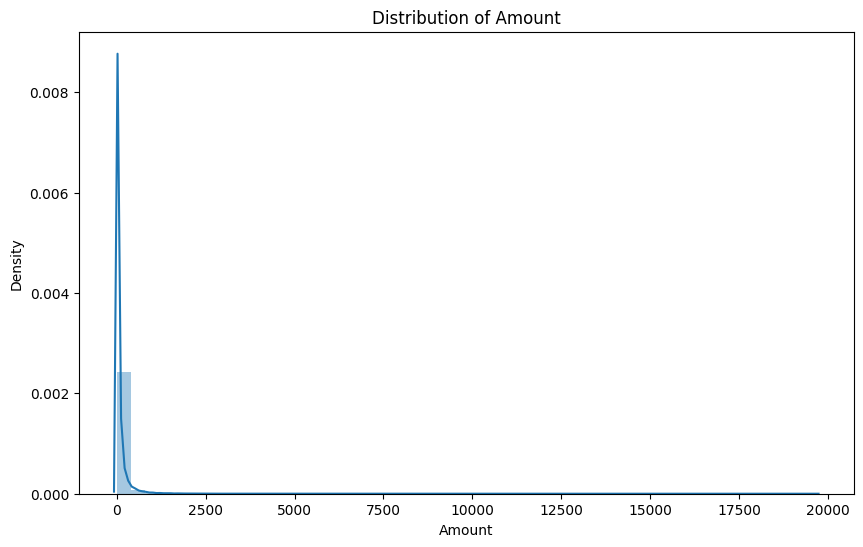

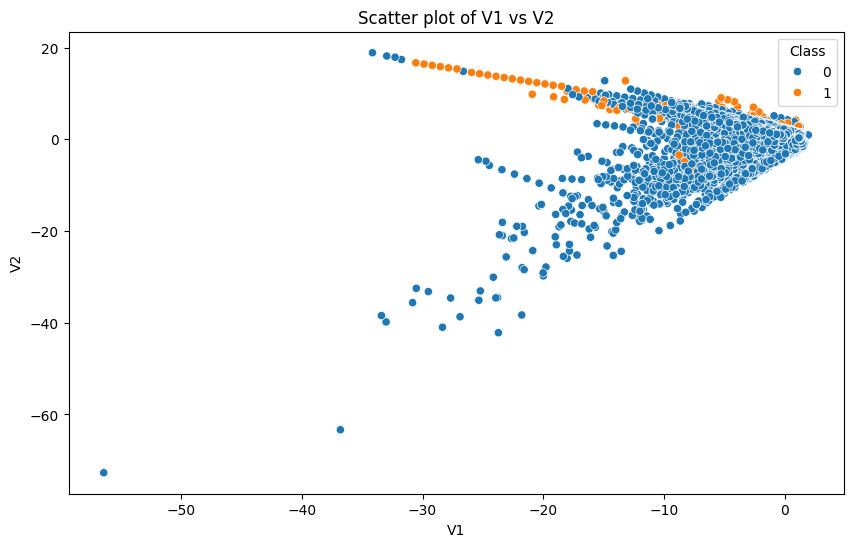

In [32]:
# prompt: buat data exploration untuk dataset yang telah diload, tambahkan juga visualisasi data

import matplotlib.pyplot as plt
# Data Exploration
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Convert relevant columns to numeric
for col in df.columns:
    if col not in ['Time', 'Class']:  # Exclude 'Time' and 'Class' if they are not numerical
        try:
            df[col] = pd.to_numeric(df[col])
        except ValueError:
            print(f"Warning: Could not convert column '{col}' to numeric.")

# Visualizations
# Histogram for numerical features
df.hist(figsize=(20, 20))
plt.show()

# Box plots for numerical features
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 20))
plt.show()

# Convert 'Class' column to numeric (0 and 1)
df['Class'] = pd.to_numeric(df['Class'].str.strip('"'), errors='coerce').astype(int) # Strip quotes and convert to int

# ... (rest of your code) ...
# Correlation matrix heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Pairplot for selected features (adjust as needed)
sns.pairplot(df[['V1', 'V2', 'V3', 'V4', 'V5', 'Class']], hue='Class')
plt.show()

# Distribution plots for selected features
for col in ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']:
    plt.figure(figsize=(10, 6))
    sns.distplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

# Further exploration based on specific features or relationships
# Example: Scatter plot of 'V1' vs 'V2' colored by 'Class'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V1', y='V2', hue='Class', data=df)
plt.title('Scatter plot of V1 vs V2')
plt.show()

In [34]:
# Convert 'Class' column to numeric (0 and 1)
# df['Class'] = pd.to_numeric(df['Class'].str.strip('"'), errors='coerce').astype(int) # Strip quotes and convert to int

# Pisahkan fitur dan target
X = df.drop(columns=['Class'], axis=1)
y = df['Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Feature selection: hapus fitur konstan/quasi-konstan
selector_var = VarianceThreshold(threshold=0.01)
X_train = selector_var.fit_transform(X_train)
X_test = selector_var.transform(X_test)

In [35]:
# Feature selection: mutual information
selector_mi = SelectKBest(mutual_info_classif, k=10)
X_train = selector_mi.fit_transform(X_train, y_train)
X_test = selector_mi.transform(X_test)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Penanganan imbalance dengan SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Definisikan model
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(class_weight='balanced', probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


Classification type: Binary (2 classes)


Training Logistic Regression...


Training Decision Tree...


Training KNN...


Training SVM...


Training Random Forest...


Training Gradient Boosting...

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.983948   0.997753  0.983948  0.990132
1        Decision Tree  0.999172   0.999124  0.999172  0.999124
2                  KNN  0.999310   0.999292  0.999310  0.999299
3                  SVM  0.993239   0.997702  0.993239  0.995128
4        Random Forest  0.999448   0.999436  0.999448  0.999416
5    Gradient Boosting  0.998298   0.998213  0.998298  0.998252


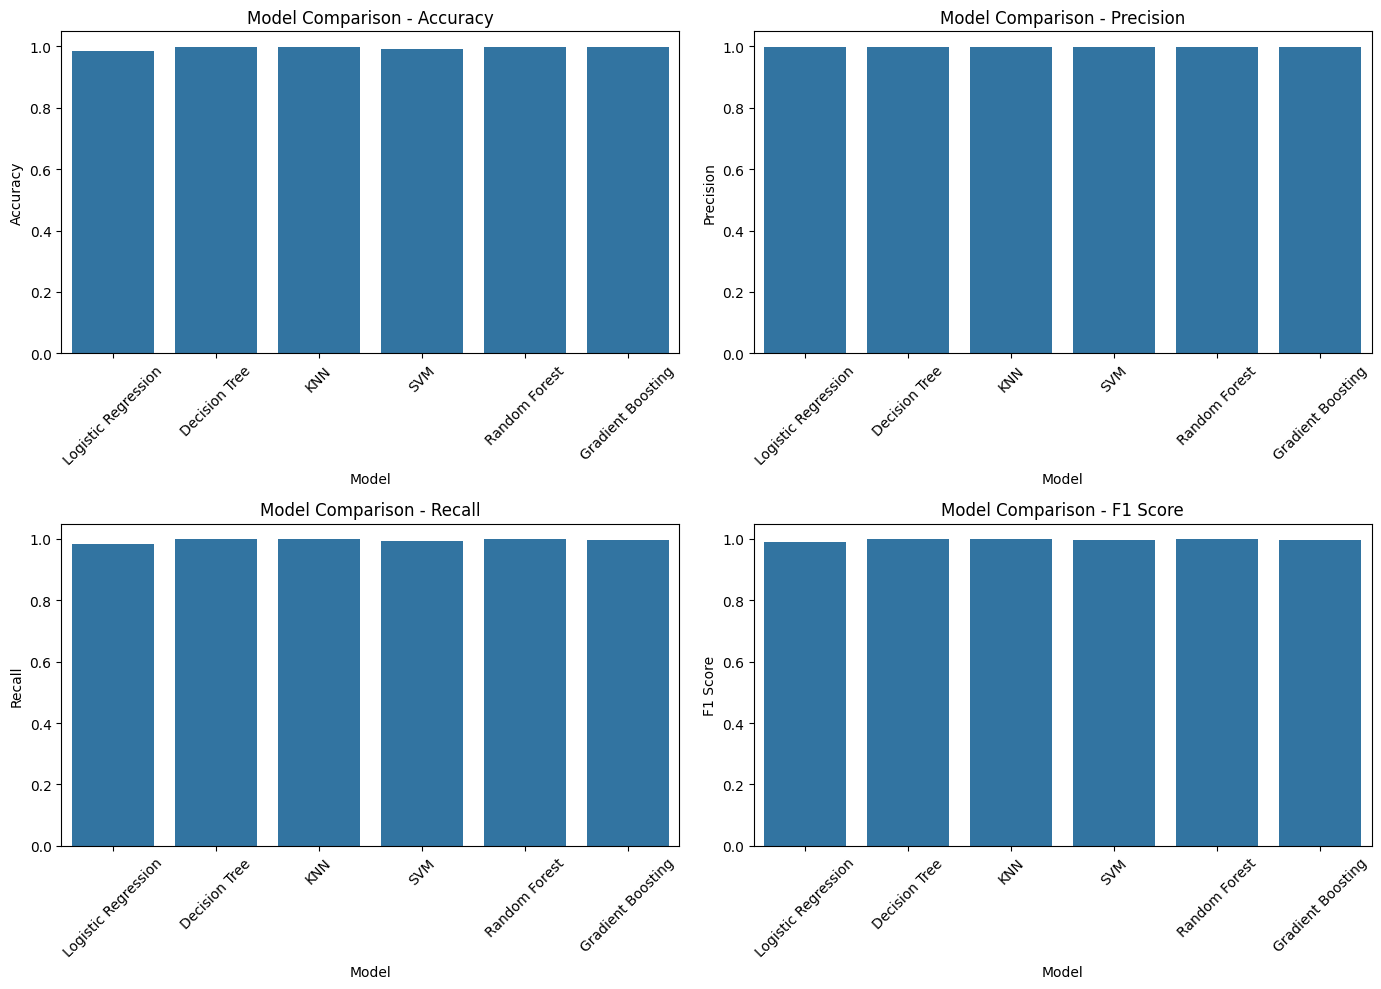

In [37]:
# Train and evaluate each model
results = []
model_predictions = {}
model_probabilities = {}

# Check if binary or multi-class classification
n_classes = len(np.unique(y))
is_binary = (n_classes == 2)

print(f"\nClassification type: {'Binary' if is_binary else 'Multi-class'} ({n_classes} classes)")

for name, model in models.items():
    print(f"\n\nTraining {name}...")
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    model_predictions[name] = y_pred

    # Get prediction probabilities if the model supports it
    try:
        y_prob = model.predict_proba(X_test)
        model_probabilities[name] = y_prob
    except:
        print(f"Warning: {name} doesn't support predict_proba, skipping ROC/AUC for this model")
        model_probabilities[name] = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

# Create a DataFrame with all results for easier comparison
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)

# Plot model performances - Bar Chart Comparison
plt.figure(figsize=(14, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



=== Detailed Evaluation for Logistic Regression ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     21694
           1       0.11      0.88      0.19        48

    accuracy                           0.98     21742
   macro avg       0.55      0.93      0.59     21742
weighted avg       1.00      0.98      0.99     21742



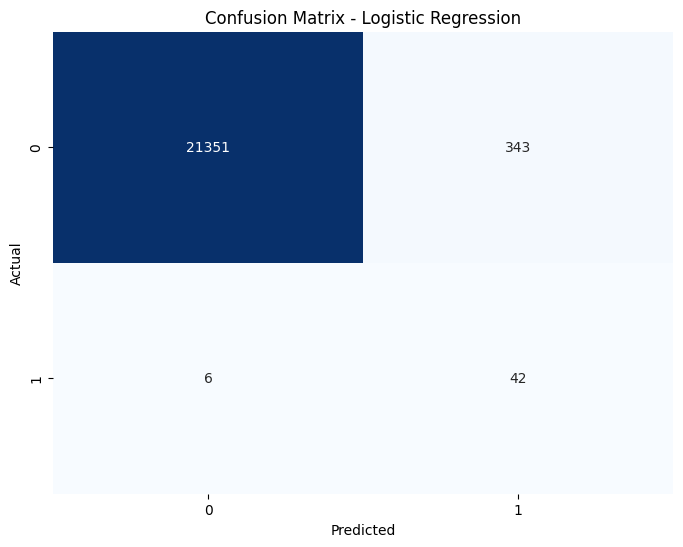

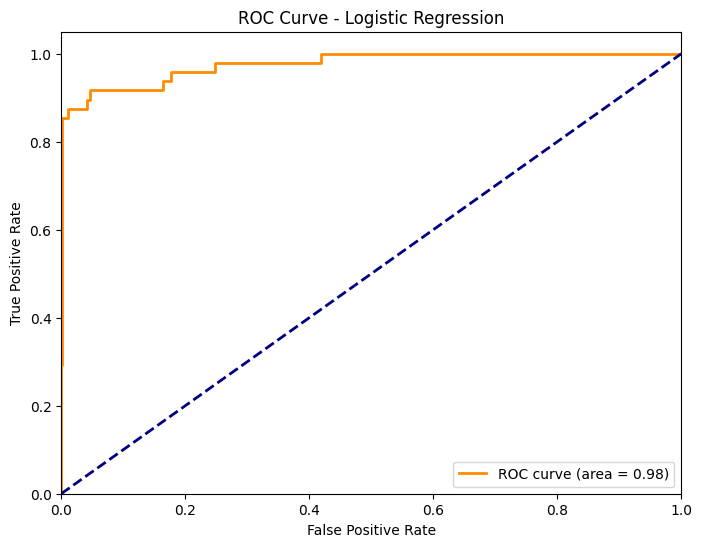



=== Detailed Evaluation for Decision Tree ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21694
           1       0.89      0.71      0.79        48

    accuracy                           1.00     21742
   macro avg       0.95      0.85      0.90     21742
weighted avg       1.00      1.00      1.00     21742



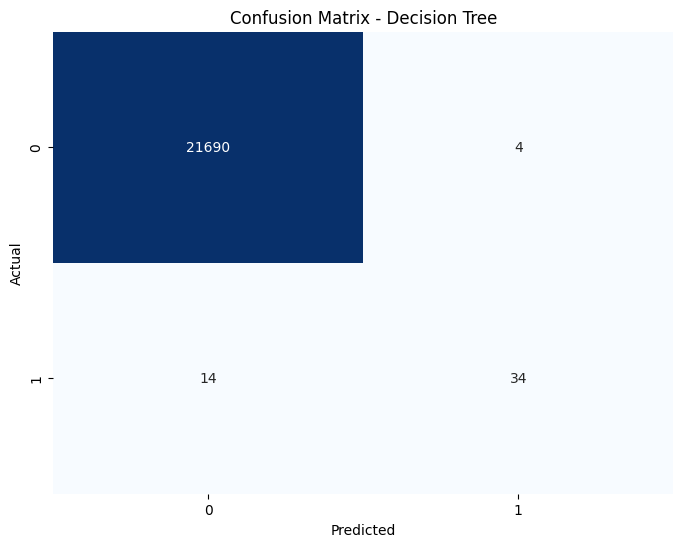

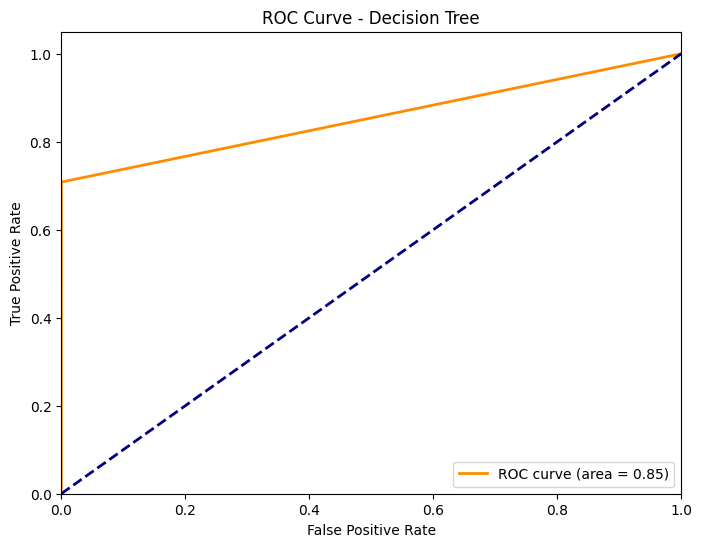



=== Detailed Evaluation for KNN ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21694
           1       0.87      0.81      0.84        48

    accuracy                           1.00     21742
   macro avg       0.93      0.91      0.92     21742
weighted avg       1.00      1.00      1.00     21742



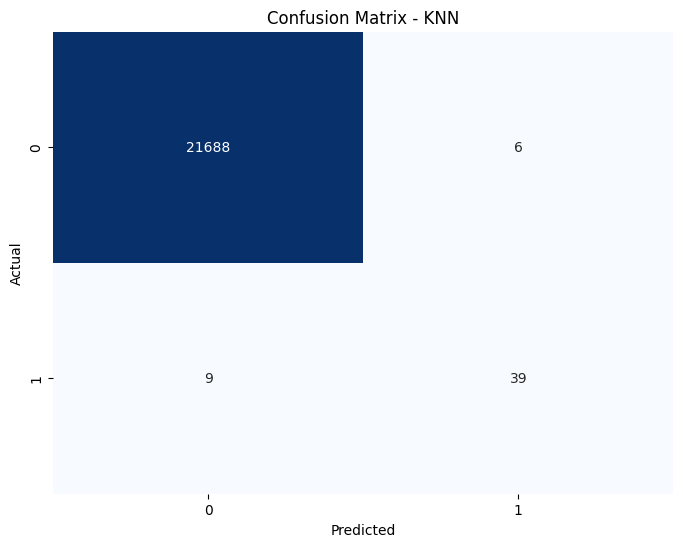

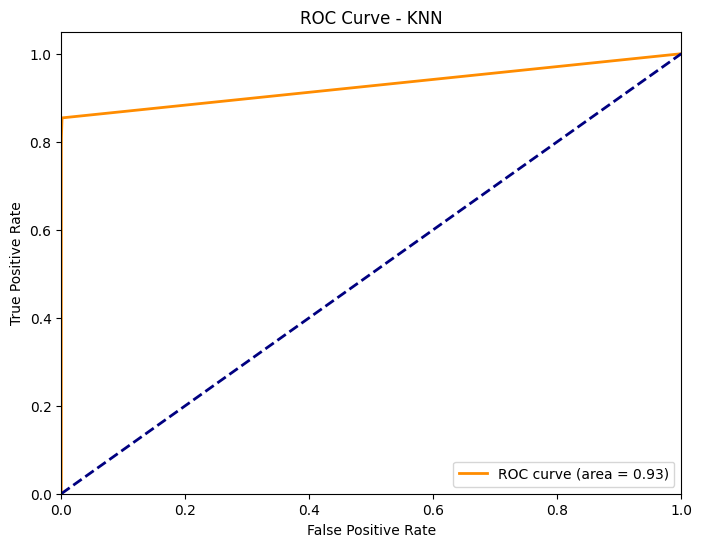



=== Detailed Evaluation for SVM ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     21694
           1       0.21      0.75      0.33        48

    accuracy                           0.99     21742
   macro avg       0.60      0.87      0.66     21742
weighted avg       1.00      0.99      1.00     21742



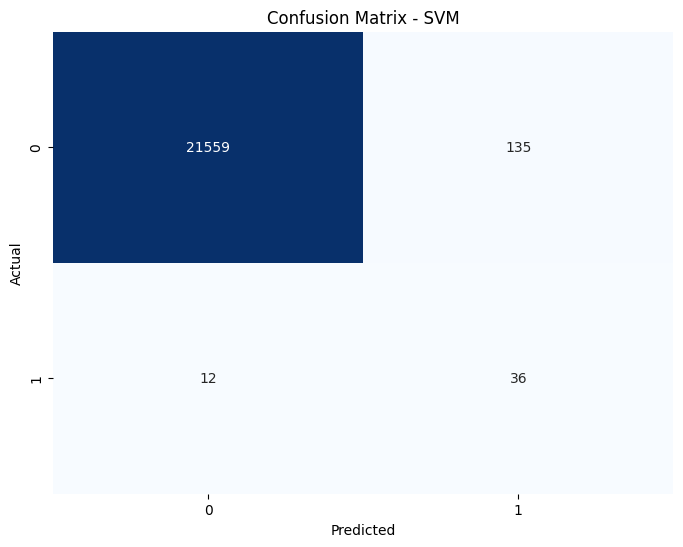

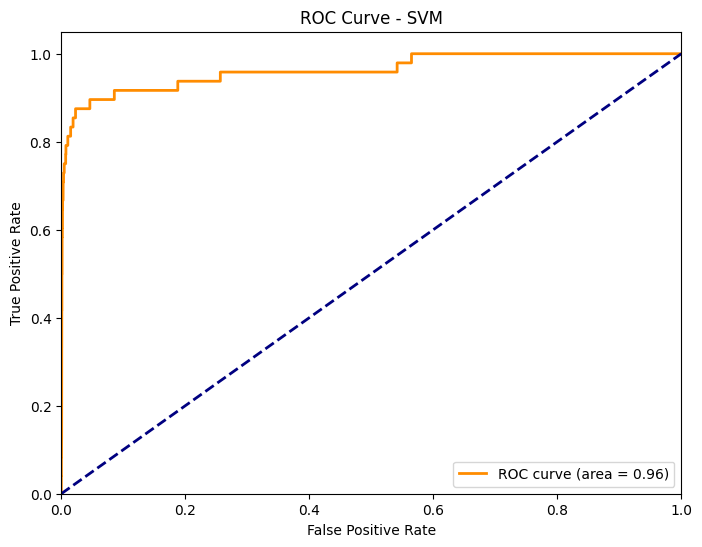



=== Detailed Evaluation for Random Forest ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21694
           1       0.97      0.77      0.86        48

    accuracy                           1.00     21742
   macro avg       0.99      0.89      0.93     21742
weighted avg       1.00      1.00      1.00     21742



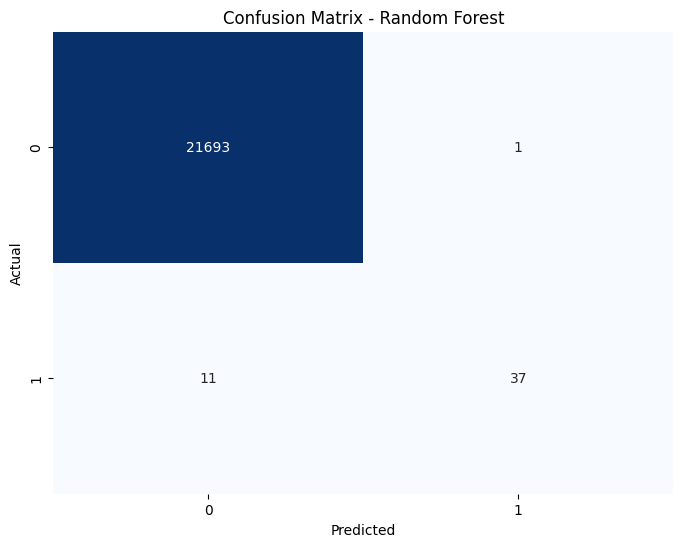

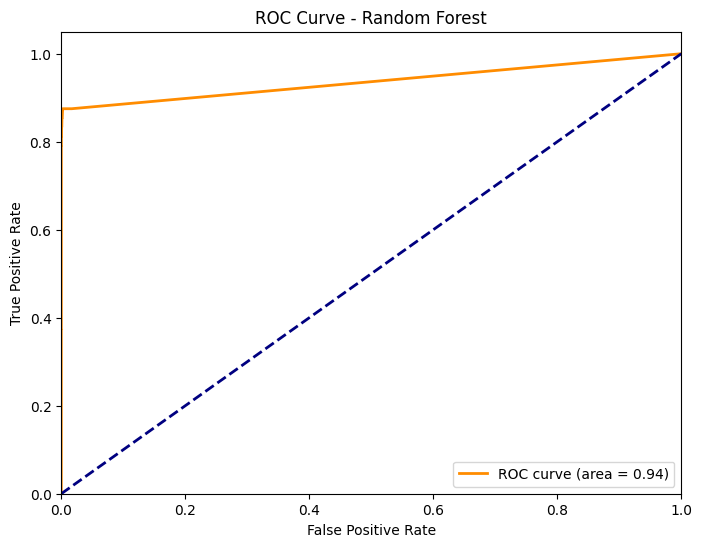



=== Detailed Evaluation for Gradient Boosting ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21694
           1       0.63      0.56      0.59        48

    accuracy                           1.00     21742
   macro avg       0.81      0.78      0.80     21742
weighted avg       1.00      1.00      1.00     21742



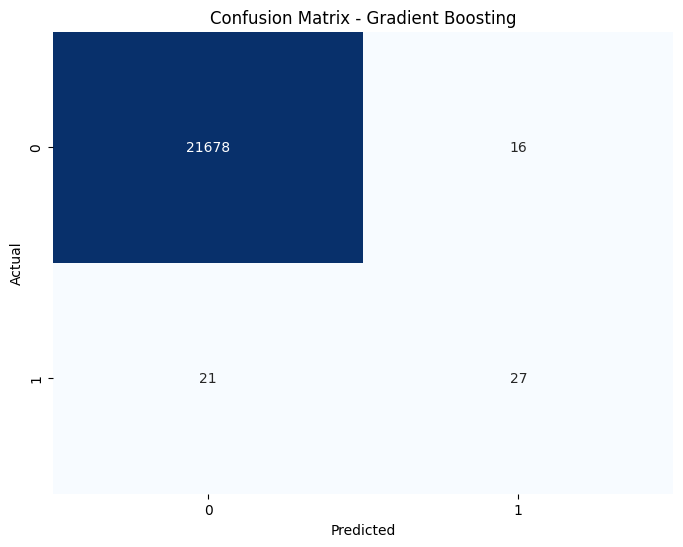

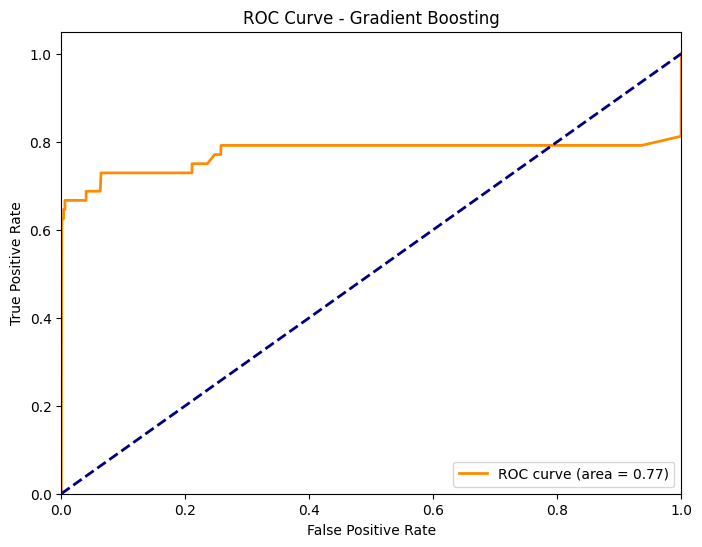


Model yang digunakan:
1. Logistic Regression: Model regresi logistik, cocok untuk klasifikasi biner dan multi-kelas.
2. Decision Tree: Model pohon keputusan, mudah diinterpretasi dan cocok untuk data non-linear.
3. KNN (K-Nearest Neighbors): Model berbasis jarak, mengklasifikasikan data berdasarkan kedekatannya dengan tetangga terdekat.
4. SVM (Support Vector Machine): Model yang mencari hyperplane terbaik untuk memisahkan kelas-kelas data.
5. Random Forest: Ensemble model yang menggabungkan beberapa pohon keputusan untuk meningkatkan akurasi dan stabilitas.
6. Gradient Boosting: Ensemble model yang membangun pohon keputusan secara berurutan, dimana setiap pohon mencoba memperbaiki kesalahan pohon sebelumnya.

Analisa :
1. a. Ketidaksesuaian AUC-ROC tinggi dan Presisi rendah menunjukkan adanya ketidakseimbangan kelas yang signifikan dalam dataset atau masalah dalam model. AUC-ROC mengukur kemampuan model untuk membedakan antara kelas positif dan negatif secara keseluruhan, sedangkan P

In [41]:
# Detailed evaluation for each model - confusion matrices and ROC/AUC
for name in models.keys():
    y_pred = model_predictions[name]
    y_prob = model_probabilities[name]

    print(f"\n\n=== Detailed Evaluation for {name} ===")

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve and AUC (for binary classification or one-vs-rest for multi-class)
    if y_prob is not None:
        if is_binary:
            # Binary classification
            fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
            roc_auc = auc(fpr, tpr)

            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'ROC Curve - {name}')
            plt.legend(loc='lower right')
            plt.show()
        else:
            # Multi-class classification - one vs rest
            n_classes = y_prob.shape[1]
            fpr = {}
            tpr = {}
            roc_auc = {}

            plt.figure(figsize=(10, 8))

            for i in range(n_classes):
                fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_prob[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])

                plt.plot(fpr[i], tpr[i], lw=2,
                        label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

            plt.plot([0, 1], [0, 1], 'k--', lw=2)
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'Multi-class ROC - {name}')
            plt.legend(loc='lower right')
            plt.show()

            # Compute macro-average ROC curve and ROC area
            # First aggregate all false positive rates
            all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

            # Then interpolate all ROC curves at this points
            mean_tpr = np.zeros_like(all_fpr)
            for i in range(n_classes):
                mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

            # Finally average it and compute AUC
            mean_tpr /= n_classes

            macro_roc_auc = auc(all_fpr, mean_tpr)

            plt.figure(figsize=(8, 6))
            plt.plot(all_fpr, mean_tpr, color='darkorange', lw=2,
                    label=f'Macro-average ROC (area = {macro_roc_auc:.2f})')
            plt.plot([0, 1], [0, 1], 'k--', lw=2)
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'Macro-average ROC - {name}')
            plt.legend(loc='lower right')
            plt.show()


print("\nModel yang digunakan:")
print("1. Logistic Regression: Model regresi logistik, cocok untuk klasifikasi biner dan multi-kelas.")
print("2. Decision Tree: Model pohon keputusan, mudah diinterpretasi dan cocok untuk data non-linear.")
print("3. KNN (K-Nearest Neighbors): Model berbasis jarak, mengklasifikasikan data berdasarkan kedekatannya dengan tetangga terdekat.")
print("4. SVM (Support Vector Machine): Model yang mencari hyperplane terbaik untuk memisahkan kelas-kelas data.")
print("5. Random Forest: Ensemble model yang menggabungkan beberapa pohon keputusan untuk meningkatkan akurasi dan stabilitas.")
print("6. Gradient Boosting: Ensemble model yang membangun pohon keputusan secara berurutan, dimana setiap pohon mencoba memperbaiki kesalahan pohon sebelumnya.")

print('\nAnalisa :')
print("1. a. Ketidaksesuaian AUC-ROC tinggi dan Presisi rendah menunjukkan adanya ketidakseimbangan kelas yang signifikan dalam dataset atau masalah dalam model. AUC-ROC mengukur kemampuan model untuk membedakan antara kelas positif dan negatif secara keseluruhan, sedangkan Presisi mengukur proporsi prediksi positif yang benar. Jika dataset memiliki lebih banyak contoh negatif daripada positif, model dapat mencapai AUC-ROC tinggi hanya dengan memprediksi sebagian besar contoh sebagai negatif. Dengan demikian, presisi rendah menunjukkan bahwa saat model memprediksi kelas positif, banyak yang salah. Kemungkinan lain yaitu, model mungkin overfitting pada data training,  sehingga performanya buruk di data testing, atau model terlalu kompleks untuk dataset, sehingga gagal menggeneralisasi ke data yang belum pernah dilihat. ")
print("   b. Strategi untuk meningkatkan presisi tanpa mengurangi AUC-ROC secara signifikan:")
print("     - Penyeimbangan Kelas (Class Weighting): Pada algoritma seperti regresi logistik, pohon keputusan, dan SVM, penyeimbangan kelas memberatkan kelas minoritas. Hal ini memungkinkan model untuk lebih memperhatikan contoh-contoh yang jarang, yang dapat meningkatkan presisi tanpa mengorbankan banyak kemampuan pembedaan keseluruhan.")
print("     - Teknik Sampling (SMOTE): SMOTE adalah algoritma oversampling yang menghasilkan contoh-contoh sintetis untuk kelas minoritas, sehingga seimbang dengan kelas mayoritas. Hal ini membantu model belajar lebih baik dari kelas minoritas, dan dapat meningkatkan presisi dan recall.")
print("     - Threshold Adjustment: Jika ada kemungkinan prediksi probabilitas, maka mengubah ambang batas klasifikasi (threshold) dapat meningkatkan presisi.  Saat ini threshold mungkin terlalu rendah, sehingga terlalu banyak contoh diklasifikasikan sebagai positif.")
print("     - Regularization: Penggunaan regularisasi L1 atau L2 bisa mengurangi kompleksitas model dan membantu menggeneralisasikan dengan lebih baik, meningkatkan presisi pada data testing.")
print("     - Penyetelan Hyperparameter: Misalnya, di algoritma RandomForest atau GradientBoosting, parameter seperti jumlah pohon (n_estimators), kedalaman pohon (max_depth), dan jumlah sampel per pohon (min_samples_leaf) perlu disetel untuk optimal.")
print("     - Feature Engineering: Terkadang menambahkan fitur baru atau menghapus fitur yang tidak relevan dapat memperbaiki model. Feature selection adalah cara yang juga bisa mempertimbangkan untuk mengurangi noise.")
print("     - Cross Validation: Lakukan cross validation dengan berbagai teknik untuk memastikan bahwa model tidak overfitting data training. Dengan membandingkan skor validasi di tiap fold, kita bisa memilih model yang performanya lebih stabil.")
print("  c. Recall sangat penting karena terkait dengan biaya false negative (FN), yang dalam beberapa kasus bisa sangat tinggi. Recall mengukur proporsi dari semua kelas positif yang diprediksi benar oleh model. False negative adalah kasus dimana model gagal memprediksi kelas positif ketika kelas sesungguhnya adalah positif.  FN bisa merugikan jika kita melewatkan contoh penting. Bayangkan jika kita menggunakan model untuk mendeteksi kanker, maka FN merupakan hasil false negatif, dimana model memprediksi tidak ada kanker, padahal pasien terkena kanker. FN dapat berdampak buruk bagi kesehatan pasien. Oleh karena itu, recall perlu dipertimbangkan untuk meminimalkan FN dan mengurangi potensi kerugian.")
print("  d.  Hubungan antara Recall dan cost false negative yaitu, semakin tinggi cost false negative, semakin tinggi kita ingin Recall-nya. Jika cost false negative tinggi, kita lebih cenderung menerima beberapa false positive, asalkan tidak ada false negative, sehingga recall harus tinggi. Jadi kita lebih memilih model yang mungkin akan memprediksi lebih banyak false positive, tetapi meminimalkan false negative.")

print("\n2. Dampak High-Cardinality Categorical Feature:")
print("   1. Estimasi Koefisien:")
print("       - Fitur kategorikal dengan banyak nilai unik dapat menyebabkan model machine learning menghasilkan estimasi koefisien yang tidak stabil dan tidak akurat. Hal ini karena setiap nilai unik akan memiliki koefisien tersendiri.  Dengan 1000 nilai unik, model akan berusaha untuk mempelajari 1000 koefisien berbeda, yang akan meningkatkan kerumitan model dan berpotensi menyebabkan overfitting.")
print("       - Overfitting ini dapat mengakibatkan model menjadi kurang mampu menggeneralisasi data baru yang belum pernah dilihatnya. Akibatnya, presisi model akan menurun pada data testing.")
print("   2. Stabilitas Presisi:")
print("       - Presisi model dapat terpengaruh secara signifikan. Karena banyaknya parameter yang harus dipelajari, model akan lebih sensitif terhadap variasi kecil pada data pelatihan. Setiap perubahan data bisa menyebabkan perubahan signifikan pada estimasi koefisien, dan akibatnya, nilai presisi akan berubah-ubah.")
print("       - Variasi dalam data training dapat menyebabkan model tidak konsisten dalam prediksinya, sehingga presisi model dapat berfluktuasi.")
print("\n Risiko Data Leakage dengan Target Encoding:")
print("   Target encoding menggantikan nilai kategorikal dengan rata-rata target untuk nilai tersebut. Dalam dataset yang besar seperti ini, dengan 1000 nilai unik, terdapat risiko data leakage. Jika target encoding dilakukan *sebelum* pembagian data menjadi train-test, maka informasi tentang target pada data testing telah 'bocor' ke dalam data training melalui perhitungan rata-rata target. Akibatnya, model akan tampak performanya sangat bagus pada data testing, padahal tidak mampu menggeneralisasi dengan baik pada data yang baru.")

print("\n Alternatif Encoding yang Lebih Aman:")
print("   1. Hashing:")
print("       - Teknik ini mengubah nilai kategorikal menjadi angka dengan menggunakan fungsi hash.  Meskipun beberapa nilai kategorikal berbeda dapat dipetakan ke angka yang sama (collision), hal ini seringkali menghasilkan kinerja yang cukup baik dan menghindari risiko data leakage. Ini merupakan solusi umum untuk kategori high-cardinality.")
print("   2. Feature Hashing")
print("       -  Merupakan metode untuk mengubah nilai kategorikal menjadi angka dengan menggunakan fungsi hash.")
print("       - Mengurangi dimensi vektor representasi fitur, namun dapat menyebabkan *collision* atau beberapa nilai kategorik yang unik direpresentasikan dengan angka yang sama.")

print("   3. Count Encoding:")
print("       - Menggantikan nilai kategorikal dengan frekuensi kemunculannya di dalam dataset.  Cara ini menangkap informasi penting tanpa 'membocorkan' target.")
print("   4. Target Encoding dengan Regularization (Leave-one-out atau smoothing):")
print("       - Untuk mengurangi leakage, kita dapat menggunakan strategi seperti Leave-one-out encoding, di mana rata-rata target dihitung dari data latih tanpa data titik yang sedang di encode. Smoothing juga dapat digunakan untuk membuat estimasi yang lebih stabil.")
print("   5. CatBoost Encoding")
print("       - CatBoost Encoding secara efektif mempertimbangkan distribusi fitur kategorikal dalam meng-encode data.")

print("\n3. Analisis dampak normalisasi terhadap decision boundary dan margin kelas minoritas:")
print("   Normalisasi Min-Max menskalakan fitur ke rentang tertentu (biasanya 0-1). Pada SVM linear, ini dapat mempengaruhi decision boundary dan margin. Peningkatan presisi menunjukkan bahwa decision boundary menjadi lebih baik dalam mengklasifikasikan kelas mayoritas, tetapi penurunan recall menunjukkan margin kelas minoritas mungkin menyempit atau decision boundary bergeser, sehingga sulit mengidentifikasi kelas minoritas secara akurat.  Normalisasi mungkin telah meningkatkan pemisahan antara kelas, namun pada saat bersamaan juga mengurangi margin bagi kelas minoritas, yang menyebabkan beberapa anggota kelas minoritas diklasifikasikan keliru.")

print("\n Mengapa scaling yang sama mungkin memiliki efek berlawanan jika diterapkan pada model Gradient Boosting?")
print("   Gradient Boosting membangun pohon keputusan secara berurutan. Setiap pohon baru mencoba untuk memperbaiki kesalahan pohon sebelumnya. Scaling fitur dapat berpengaruh pada perhitungan pentingnya fitur. Karena sifatnya yang berurutan, normalisasi fitur yang mengubah perhitungan pentingnya fitur dapat menyebabkan Gradient Boosting menghasilkan pohon-pohon yang berurutan dalam arah yang berbeda, sehingga menghasilkan dampak negatif terhadap performanya.")

print("\n4. Penjelasan Peningkatan AUC-ROC dengan Feature Interaction:")
print("   Perkalian dua fitur menciptakan fitur baru yang merepresentasikan interaksi non-linear antara keduanya.  Model yang menggunakan fitur interaksi ini sekarang dapat membentuk decision boundary yang lebih kompleks, yang tidak dapat dicapai oleh model yang hanya menggunakan fitur asli secara individual.")
print("   Decision boundary non-linear berarti garis pembatas antara kelas bukan garis lurus atau bidang datar, tetapi dapat berupa kurva atau permukaan yang lebih kompleks.  Dengan menggabungkan dua fitur melalui perkalian, kita memungkinkan model untuk mempelajari pola yang tidak linear di antara fitur-fitur tersebut, yang bisa saja berdampak pada peningkatan akurasi klasifikasi.")
print("   Sebagai contoh, bayangkan dua fitur, 'usia' dan 'pendapatan'. Secara individual, mungkin tidak ada pola yang jelas untuk memprediksi pembelian mobil mewah. Namun, perkalian 'usia' dan 'pendapatan' mungkin menunjukkan bahwa orang-orang dengan usia muda *dan* pendapatan tinggi cenderung lebih mungkin membeli mobil mewah.  Dengan perkalian, kita membuat fitur baru yang menunjukkan interaksi antara kedua fitur tersebut.")
print("\n Kenapa Chi-Square Gagal Mendeteksi Interaksi Ini:")
print("   Uji statistik seperti chi-square umumnya menguji hubungan linear atau independensi antara dua variabel. Mereka mencari korelasi atau ketergantungan sederhana antara fitur-fitur. Chi-square kurang peka terhadap interaksi non-linear.")
print("   Interaksi antara 'usia' dan 'pendapatan' yang dijelaskan sebelumnya adalah contoh bagaimana hubungan antara dua variabel dapat non-linear. Uji chi-square tidak dapat menangkap hubungan ini karena hanya melihat korelasi linear.")
print("\n Metode Domain Knowledge Sebagai Alternatif:")
print("   Pengetahuan pakar tentang domain masalah sangat berharga untuk menemukan interaksi fitur yang kompleks.  Misalnya, seorang ahli bisnis mungkin tahu bahwa kombinasi spesifik antara harga dan promosi dapat menghasilkan peningkatan penjualan. Pengalaman dan pemahaman tentang mekanisme mendasar yang mendasari data dapat digunakan untuk menginformasikan feature engineering secara lebih efektif.")
print("   Selain itu, beberapa metode lain, seperti analisis cluster, bisa juga digunakan untuk menganalisis apakah ada kelompok data yang memiliki karakteristik unik yang sebelumnya tidak terlihat secara individual pada setiap fitur, yang dapat dimanfaatkan sebagai informasi baru untuk meningkatkan model.")

print("\n5. Penjelasan mengapa temporal split lebih aman untuk fraud detection:")
print("   Pada fraud detection, data cenderung memiliki pola temporal.  Transaksi yang terjadi lebih baru mungkin memiliki karakteristik yang berbeda dari transaksi lama. Jika kita melakukan random split, kita berisiko memasukkan informasi dari masa depan ke dalam data training.  Model akan 'melihat' pola fraud di masa depan dan akan performanya tinggi pada data testing (yang juga berasal dari masa depan). Tapi saat diterapkan di dunia nyata, model tersebut tidak akan bekerja sebaik yang diharapkan. Temporal split memecahkan masalah ini. Kita membagi data berdasarkan waktu, sehingga data training hanya berisi transaksi yang terjadi *sebelum* data testing. Ini mensimulasikan skenario dunia nyata yang lebih akurat, dan menghindari data leakage.")

print("\n Bagaimana stratified sampling memperparah masalah pada fraud detection:")
print("   Stratified sampling bertujuan untuk menjaga proporsi kelas dalam setiap split data (training dan testing). Walaupun berguna dalam beberapa kasus, pada fraud detection dengan data temporal, stratified sampling dapat memperparah data leakage. Bayangkan kita melakukan stratified sampling dan mendapatkan sampel data training yang berisi transaksi fraud dari akhir periode. Ini berarti model akan belajar dari pola fraud di akhir periode dan dapat dengan mudah mengidentifikasi fraud pada data testing yang juga diambil dari akhir periode, meskipun model tersebut tidak mampu menggeneralisasi ke fraud di awal periode. Karena itu, stratified sampling tanpa memperhatikan aspek temporal dapat membuat model overfitting ke data testing.")

print("\n Desain preprocessing yang benar untuk evaluasi metrik Presisi/Recall yang realistis:")
print("   1. **Temporal Split:** Bagi data berdasarkan waktu. Misalnya, 80% data terlama untuk training dan 20% data terbaru untuk testing.  Ini memastikan bahwa model tidak 'melihat' masa depan.")
print("   2. **Oversampling (jika diperlukan):** Lakukan oversampling *hanya* pada data training *setelah* temporal split.  Ini menghindari data leakage karena kita tidak memperkenalkan data sintetis berdasarkan sampel pada data testing.")
print("   3. **Scaling:** Lakukan scaling pada fitur numerik *setelah* split data training dan data testing. Gunakan parameter scaling yang diperoleh dari data training untuk mentransformasi data testing. Jangan melakukan fitting ulang scaler pada data testing.")
print("   4. **Feature Selection/Engineering:** Lakukan seleksi/engineering fitur *setelah* split data training dan testing. Pastikan pengetahuan yang diperoleh hanya dari data training diterapkan pada data testing.")
print("   5. **Evaluasi dengan tepat:** Gunakan metrik yang sesuai seperti Presisi, Recall, F1-score, AUC-ROC, dan confusion matrix pada data testing. Perhatikan bahwa metrik validasi tidak sepenuhnya merepresentasikan performa di data testing.")
print("   6. **Pertimbangkan cross-validation time series (misalnya rolling-origin validation):** Ini dapat memberikan perkiraan kinerja yang lebih robust.")
